In [1]:
%pylab inline
from mba import *
from numpy.random import random, seed
seed(13)

Populating the interactive namespace from numpy and matplotlib


`cmin` and `cmax` are coordinates of the bottom-left and the top-right corners of the bounding box containing scattered data. `coo` and `val` are arrays containing coordinates and values of the data points.

In [2]:
cmin = [0.0, 0.0]
cmax = [1.0, 1.0]
coo  = random((7,2))
val  = random(coo.shape[0])

Create $n \times n$ regular grid of coordinates to interpolate onto.

In [3]:
n = 100
s = linspace(0,1,n)
x = array(meshgrid(s,s)).transpose([1,2,0])

The `plot_surface()` function constructs MBA class with the given initial grid size, interpolates the input data over regular surface, and plots the results

In [4]:
def plot_surface(m0):
    interp = mba2(cmin, cmax, [m0,m0], coo, val)
    error = amax(abs(val - interp(coo))) / amax(abs(val))
    v = interp(x)
    pcolormesh(s, s, v, cmap='RdBu')
    scatter(x=coo[:,0], y=coo[:,1], c=val, cmap='RdBu')
    xlim([0,1])
    ylim([0,1])
    title("$m_0 = {0:}$, error = {1:.3e}".format(m0, error))
    colorbar();

The smaller the initial grid size, the smoother the interpolated surface.

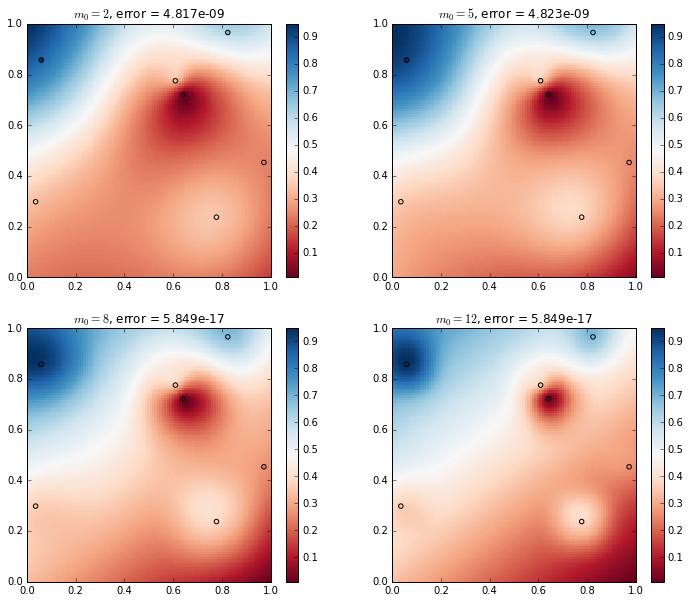

In [5]:
figure(figsize=(12,10))
subplot(221); plot_surface(2)
subplot(222); plot_surface(5)
subplot(223); plot_surface(8)
subplot(224); plot_surface(12)

Report some timings and statistics about the constructed hierarchy:

In [6]:
%%timeit
interp = mba2(cmin, cmax, [3,3], coo, val)

10000 loops, best of 3: 157 µs per loop


In [7]:
%%timeit interp = mba2(cmin, cmax, [3,3], coo, val)
v = interp(x)

10 loops, best of 3: 25.8 ms per loop


In [8]:
interp = mba2(cmin, cmax, [3,3], coo, val)
print(interp)

level 1: linear (-3.42e-01 * x0 + 4.70e-01 * x1 + 3.27e-01)
level 2: dense  [19, 19] (2888 bytes)
level 3: sparse [35, 35] (2472 bytes, compression: 0.25)
level 4: sparse [67, 67] (2664 bytes, compression: 0.07)

